As taken from https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful.

Attribute Information:

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

### these grades are related with the course subject, Math or Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import requests
import zipfile

### Fetch the dataset

In [2]:
response = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip')
zipcontent= response.content
with open("/tmp/student.zip", 'wb') as f:
    f.write(zipcontent)

zip_ref = zipfile.ZipFile('/tmp/student.zip', 'r')
zip_ref.extractall('/tmp/student/')
zip_ref.close()

### Load the datasets for grades in Maths and Portuguese

In [3]:
df_mat = pd.read_csv('/tmp/student/student-mat.csv', delimiter=';')
df_por = pd.read_csv('/tmp/student/student-por.csv', delimiter=';')

### Have a brief look at the columns of the dataset
We can see there are no null values (the number of objects in each column corresponds with the total number of entries).

In [4]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

### Convert categorical variables to one hot encoding
For encoding $k$ values, $k-1$ binary variables are enough.

In [5]:
df_mat = pd.get_dummies(df_mat, drop_first=True)
df_mat.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


### Correlations for success in Maths

In [6]:
corr_mat = df_mat.corr()
corr_mat_G3 = df_mat.corr()['G3']
corr_mat_G3.sort_values()

failures            -0.360415
age                 -0.161579
goout               -0.132791
romantic_yes        -0.129970
traveltime          -0.117142
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
health              -0.061335
Pstatus_T           -0.058009
Dalc                -0.054660
Fjob_other          -0.053483
Walc                -0.051939
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
freetime             0.011307
activities_yes       0.016100
guardian_mother      0.022338
absences             0.034247
famrel               0.051363
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Mjob_services        0.078429
famsize_LE3          0.081407
Fjob_teacher         0.095374
reason_reputation    0.095692
studytime            0.097820
internet_yes         0.098483
paid_yes             0.101996
sex_M     

We can see that the success of the student in mathematics (G3 score) is negatively correlated to the number of failures (makes sense) and non-school activities such as gooing out or having a romantic relationship. Also, older students have worse results than the younger ones (age negatively correlated to the final score G3).

The students with the best results in mathematics are those who performed well in previous two exams (no big surprise here). Male students with educated parents living in the urban area tend to have the best results.

In [7]:
df_por = pd.get_dummies(df_por, drop_first=True)
df_por.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0


### Correlations for success in Portuguese

In [8]:
corr_por = df_por.corr()
corr_por_G3 = df_por.corr()['G3']
corr_por_G3 = corr_por_G3.sort_values()
corr_por_G3

failures            -0.393316
school_MS           -0.284294
Dalc                -0.204719
Walc                -0.176619
reason_other        -0.132577
sex_M               -0.129077
traveltime          -0.127173
freetime            -0.122705
age                 -0.106505
health              -0.098851
absences            -0.091379
romantic_yes        -0.090583
goout               -0.087641
guardian_other      -0.080729
schoolsup_yes       -0.066405
Mjob_other          -0.059251
paid_yes            -0.054898
Fjob_services       -0.053204
Fjob_other          -0.005301
guardian_mother     -0.004415
Pstatus_T           -0.000754
nursery_yes          0.028752
Mjob_services        0.038447
Fjob_health          0.039142
famsize_LE3          0.045016
reason_home          0.046537
famsup_yes           0.059206
activities_yes       0.059791
famrel               0.063361
Mjob_health          0.101244
Fjob_teacher         0.125916
Mjob_teacher         0.134910
internet_yes         0.150025
address_U 

For portuguese, the trend is similar as for mathematics. Additionaly, the students consuming alcohol tend to have worse results. Students investing a lot of time into the students and aiming for higher education perform better.

## Exploring the target variable G3

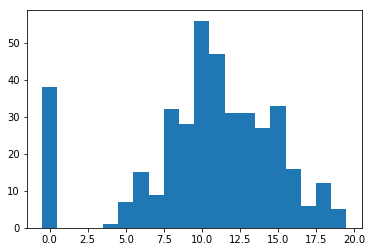

In [9]:
plt.hist(df_mat.G3, bins=np.arange(-0.5, 20.5, 1))
plt.show()

In [10]:
CORR = 0.15
correlated_vars = corr_mat_G3.index[(corr_mat_G3 > CORR) | (corr_mat_G3 < -CORR)]
correlated_vars = correlated_vars.drop('G3')

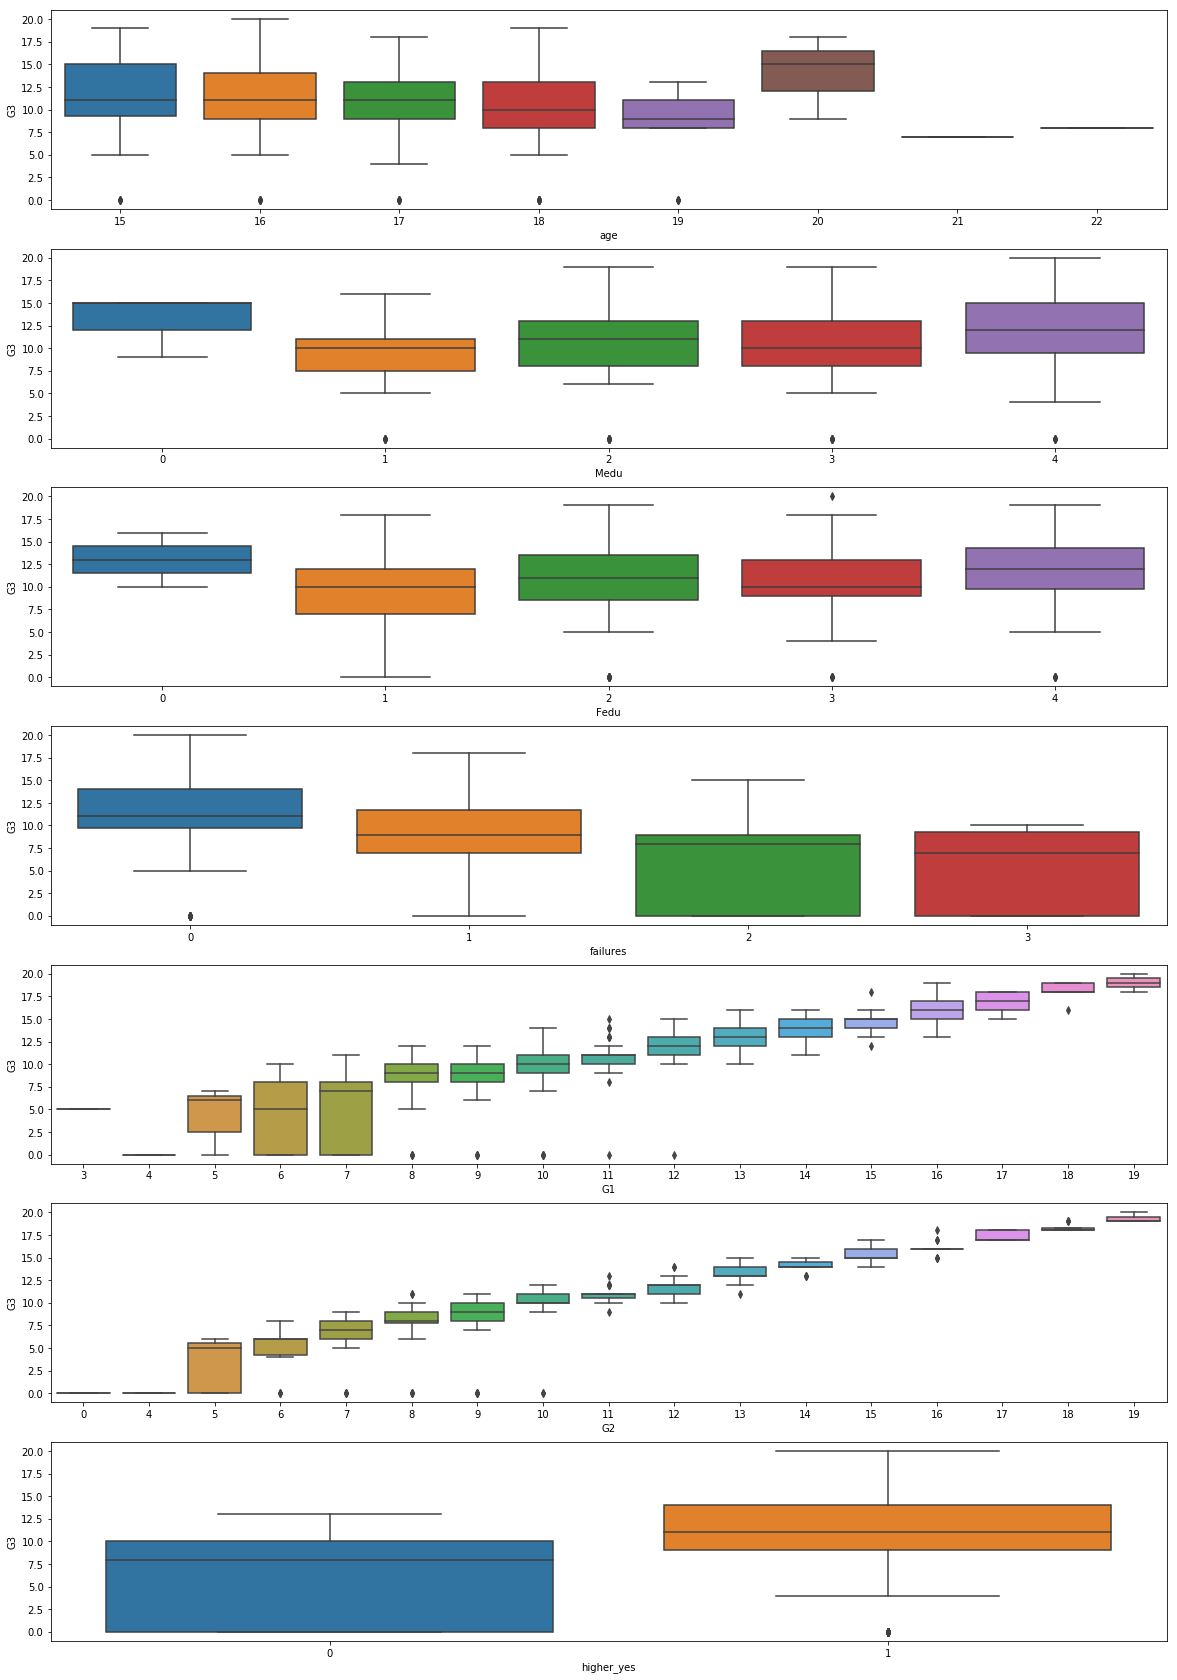

In [11]:
n = len(correlated_vars)
fig, axn = plt.subplots(n, 1, figsize=(20, 30))
for c, ax in zip(df_mat[correlated_vars], axn[:]):
    sns.boxplot(x=c, y='G3', data=df_mat, ax=ax)

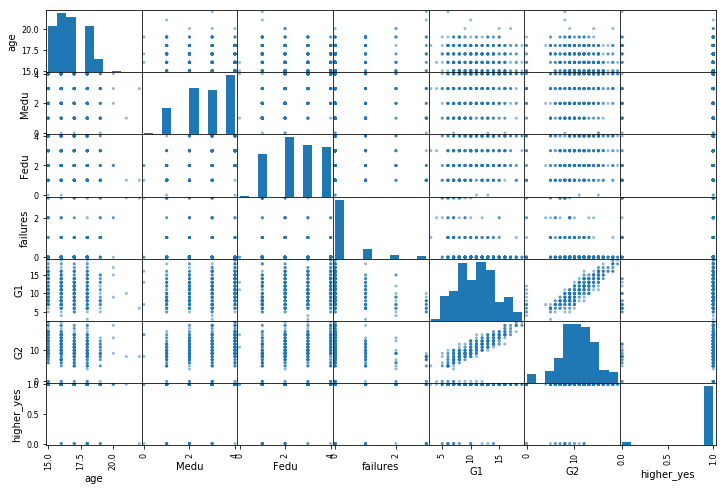

In [12]:
from pandas.plotting import scatter_matrix
attributes = correlated_vars
scatter_matrix(df_mat[attributes], figsize=(12, 8))
plt.show()

## Linear regression
We want to predict value of the variable `G3`. As `G1` and `G2` and `failures` are highly correlated to that without brining much insights, we exclude them as well.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

In [14]:
X = df_mat.copy()
X.drop(['G3'], axis=1, inplace=True)
y = df_mat['G3']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
X_train.drop(['failures','G1','G2'], axis=1, inplace=True)
X_test_all = X_test.copy()
X_test.drop(['failures','G1','G2'], axis=1, inplace=True)

/usr/local/Cellar/python/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/python/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
model_ridge = RidgeCV(cv=10)
model_ridge.fit(X_train.values, y_train.values)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=10, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

### Train set MSE

In [18]:
y_train_predict_ridge = model_ridge.predict(X_train)
mean_squared_error(y_train, y_train_predict_ridge)

16.461048670250715

### Test set MSE

In [19]:
y_test_predict_ridge = model_ridge.predict(X_test)
mean_squared_error(y_test, y_test_predict_ridge)

17.99856709118686

### Coefficients

In [20]:
coef_ridge = pd.DataFrame(model_ridge.coef_, index=X_train.columns).sort_values(0, ascending=False)
coef_ridge.columns = ['coefficients']
coef_ridge

,coefficients
higher_yes,1.496791
sex_M,1.349875
Fjob_teacher,1.042714
famsize_LE3,0.939563
school_MS,0.899813
Mjob_health,0.825058
paid_yes,0.763744
Mjob_services,0.731066
studytime,0.625356
address_U,0.482317


## Decision tree

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
model_dt = DecisionTreeRegressor(min_samples_leaf=7,
                               max_depth=8)
model_dt.fit(X_train.values, y_train.values)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=7,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Train set MSE

In [23]:
y_train_predict_dt = model_dt.predict(X_train)
mean_squared_error(y_train, y_train_predict_dt)

9.54193902755714

### Test set MSE

In [24]:
y_test_predict_dt = model_dt.predict(X_test)
mean_squared_error(y_test, y_test_predict_dt)

26.17933688061948

## Random forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
model_rf = RandomForestRegressor(n_estimators=1000,
                                 min_samples_leaf=3,
                                 max_features='auto',
                                 max_depth=10)
model_rf.fit(X_train, y_train.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Train set MSE

In [27]:
y_train_predict_rf = model_rf.predict(X_train)
mean_squared_error(y_train, y_train_predict_rf)

5.2322631262860755

### Test set MSE

In [28]:
y_test_predict_rf = model_rf.predict(X_test)
mean_squared_error(y_test, y_test_predict_rf)

17.141580180816412

### Feature importances

In [29]:
feat_importance_rf = pd.DataFrame(model_rf.feature_importances_, index=X_train.columns).sort_values(0, ascending=False)
feat_importance_rf.columns = ['feature_importance']
feat_importance_rf

,feature_importance
absences,0.199601
health,0.070319
goout,0.070135
Medu,0.065934
age,0.048826
Fedu,0.040618
famrel,0.038533
romantic_yes,0.035557
studytime,0.031120
sex_M,0.031075


In [30]:
df_eval = pd.DataFrame(data={
    'true':y_test,
    'predicted':y_test_predict_rf,
    'baseline_mean':np.full_like(y_test_predict_rf, y_train.mean())})

In [31]:
df_eval['mse_baseline'] = (df_eval['baseline_mean'] - df_eval['true'])**2
df_eval['mse_model'] = (df_eval['predicted'] - df_eval['true'])**2
df_eval['G2'] = X_test_all['G2']
df_eval['mse_G2'] = (df_eval['G2'] - df_eval['true'])**2

In [32]:
df_eval.head()

,baseline_mean,predicted,true,mse_baseline,mse_model,G2,mse_G2
57,10.39527,13.598637,15,21.203536,1.963818,15,0
319,10.39527,11.696391,11,0.365698,0.484960,11,0
167,10.39527,8.395293,16,31.412995,57.831574,15,1
358,10.39527,10.133943,10,0.156239,0.017941,10,0
96,10.39527,10.528208,15,21.203536,19.996921,15,0


In [33]:
df_eval.mean()

baseline_mean    10.395270
predicted        10.493822
true             10.474747
mse_baseline     18.033457
mse_model        17.141580
G2               10.757576
mse_G2            3.272727
dtype: float64

**We can see that the G2 variable is a better baseline than the random forest model (not using this variable).**

### Visualize the decision tree

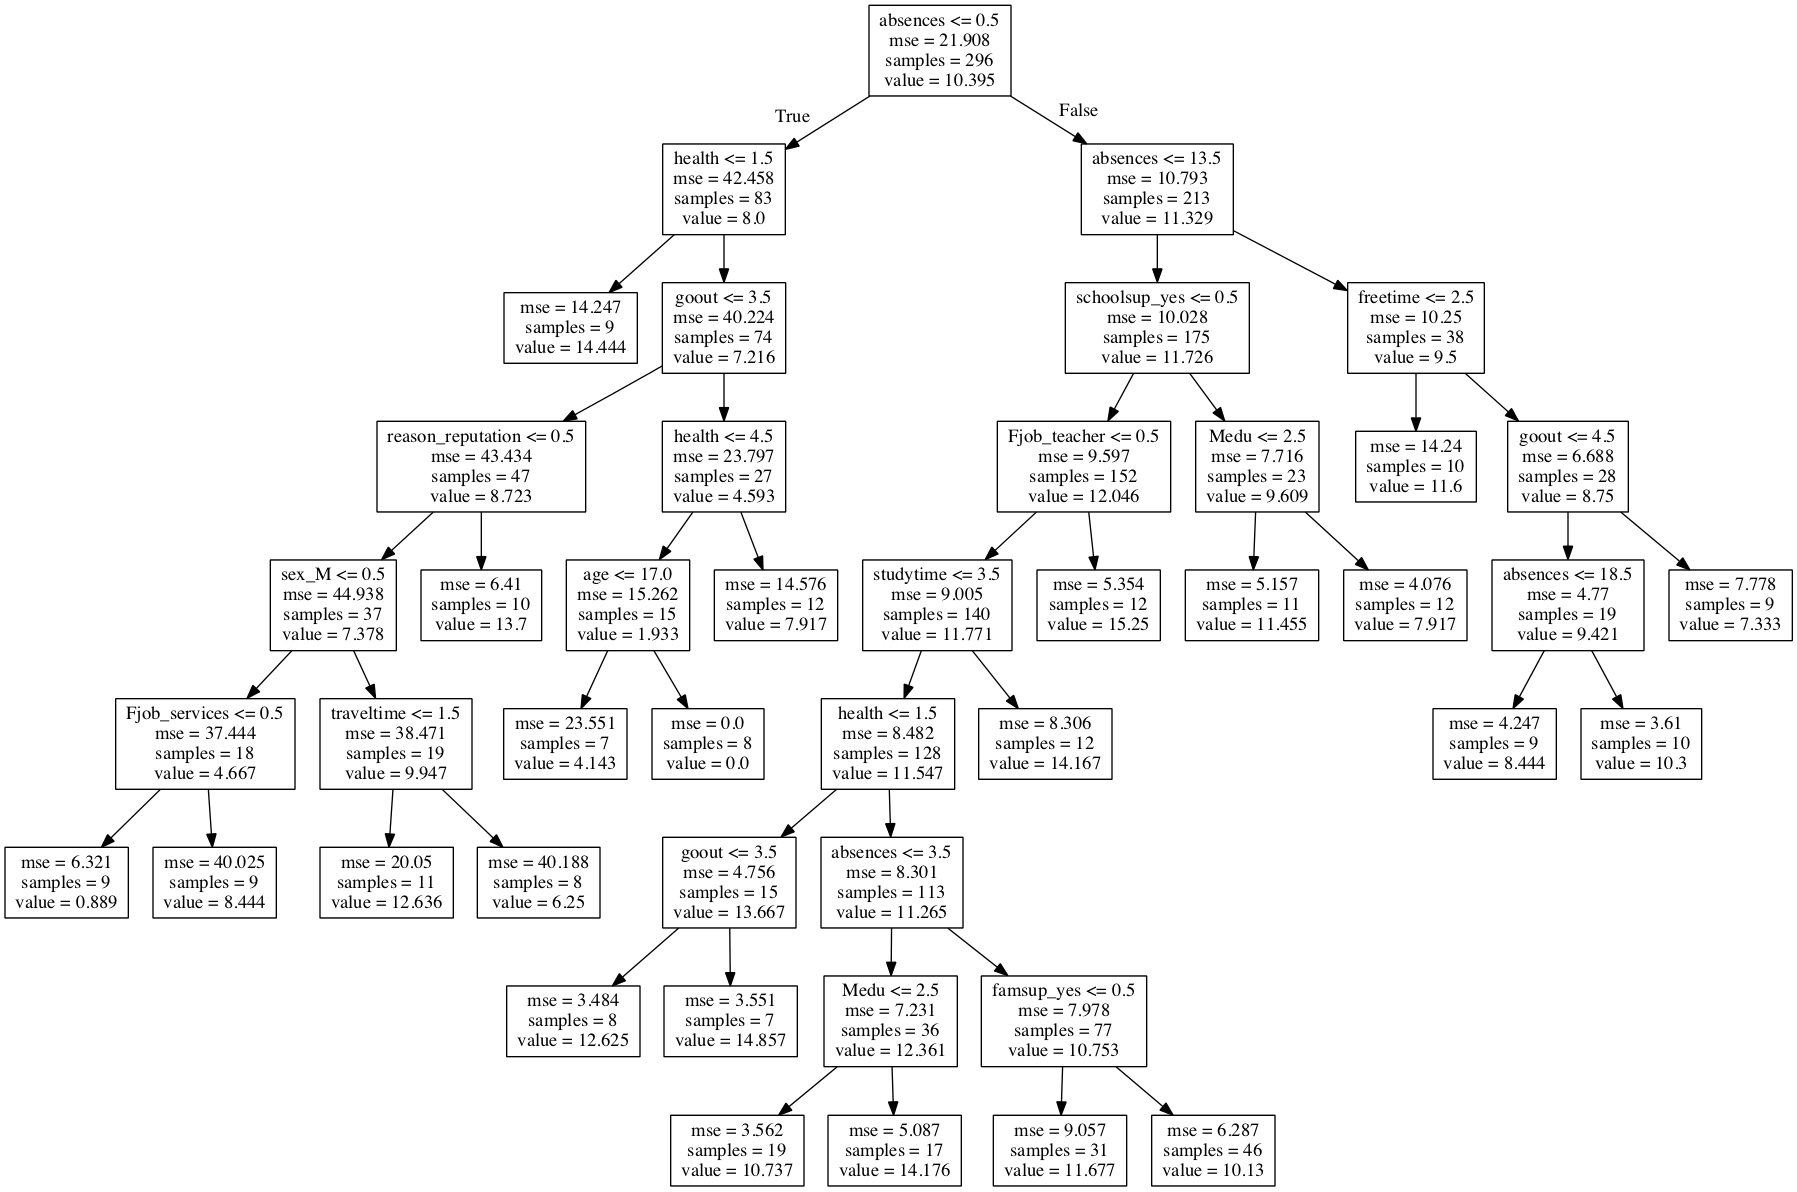

In [34]:
from sklearn.tree import export_graphviz
from IPython.display import Image

FEATURES = X_train.columns

filename_dot = 'tree.dot'
filename_png = 'tree.png'
with open(filename_dot, 'w') as f:
    f = export_graphviz(model_dt, out_file=f, feature_names=FEATURES)

# convert dot to png
!dot -Tpng $filename_dot -o $filename_png

# display the image
Image(filename = filename_png)